### Importing the Packages

In [14]:
import pandas as pd
import numpy as np

### Importing the data 

In [15]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy() 

### Lenght of the Time Period

In [16]:
df_comp.date.describe()

count           6269
unique          6269
top       14/11/2002
freq               1
Name: date, dtype: object

### From Text to Date

In [17]:
df_comp.date = pd.to_datetime(df_comp.date,dayfirst = True)

In [18]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [19]:
df_comp.date.describe()

/Users/amirmokhtari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1999-11-12 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

### Setting the Index

In [20]:
df_comp.set_index("date",inplace = True)

### Setting the Desired Frequency

In [28]:
df_comp = df_comp.asfreq("b")

In [29]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [30]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [31]:
df_comp.spx = df_comp.spx.fillna(method = 'ffill')
df_comp.ftse = df_comp.ftse.fillna(method = 'bfill')
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [32]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

### Handling Missing Values

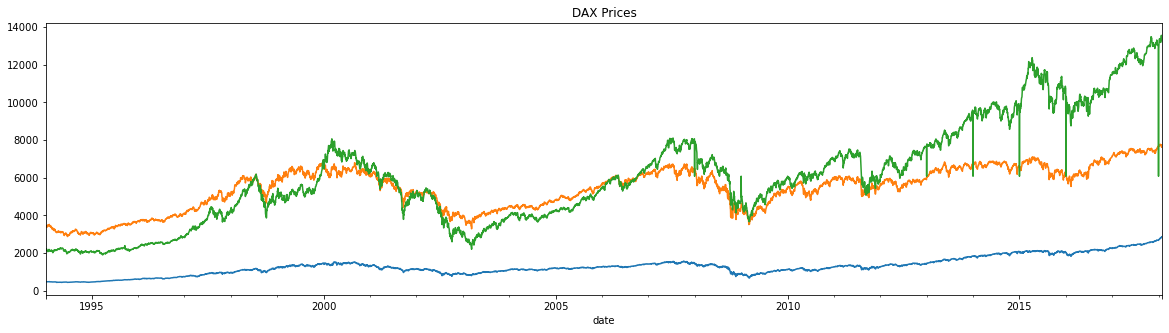

In [33]:
df_comp.spx.plot(figsize = (20,5),title = "S&P500 Prices");
df_comp.ftse.plot(figsize = (20,5),title = "FTSE Prices");
df_comp.dax.plot(figsize = (20,5),title = "DAX Prices");

### Simplifying the Dataset

In [34]:
df_comp['market_value'] = df_comp.spx

In [36]:
del df_comp['spx'],df_comp['nikkei'],df_comp['ftse']

In [38]:
del df_comp['dax']

In [39]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Splitting the Data

In [40]:
size = int(len(df_comp)*0.8)

In [43]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]